In [2]:
### header ###
__author__ = "Jenhan Tao"
__license__ = "BSD"
__email__ = "jenhantao@gmail.com"

### imports ###
import sys
import os
import pandas as pd
import numpy as np
import argparse
import matplotlib
import itertools
import scipy
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
import scipy
import pickle
from sklearn import preprocessing
import sklearn
from sklearn import decomposition
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import svm, datasets
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc
from sklearn import ensemble
from sklearn import neighbors
import networkx as nx
import matplotlib_venn
from sklearn.cross_validation import train_test_split
from random import shuffle

### notebook specific configuration ###
%matplotlib inline
matplotlib.pylab.rcParams['savefig.dpi'] = 200
sys.setrecursionlimit(3000)
sns.set_context('notebook')
%load_ext autoreload
%autoreload 2


In [3]:
os.chdir('/gpfs/data01/glasslab/home/jtao/analysis/scratch/')

### Human DMHCA

In [9]:
human_dmhca_down_genes = set()
with open ('/home/jtao/analysis/dhcr24_MTP_analysis/gene_ontology/DMHCA_down.txt') as f:
    data = f.readlines()
for gene in data:
    human_dmhca_down_genes.add(gene.strip())
human_dmhca_up_genes = set()
with open ('/home/jtao/analysis/dhcr24_MTP_analysis/gene_ontology/DMHCA_up.txt') as f:
    data = f.readlines()
for gene in data:
    human_dmhca_up_genes.add(gene.strip())

### Human Des

In [10]:
human_des_down_genes = set()
with open ('/home/jtao/analysis/dhcr24_MTP_analysis/gene_ontology/Des_down.txt') as f:
    data = f.readlines()
for gene in data:
    human_des_down_genes.add(gene.strip())
human_des_up_genes = set()
with open ('/home/jtao/analysis/dhcr24_MTP_analysis/gene_ontology/Des_up.txt') as f:
    data = f.readlines()
for gene in data:
    human_des_up_genes.add(gene.strip())

### Mouse DMHCA

In [11]:
mouse_dmhca_down_genes = set()
with open ('/home/jtao/analysis/dhcr24_thiomac_analysis/gene_ontology/DMHCA_down.txt') as f:
    data = f.readlines()
for gene in data:
    mouse_dmhca_down_genes.add(gene.strip())
mouse_dmhca_up_genes = set()
with open ('/home/jtao/analysis/dhcr24_thiomac_analysis/gene_ontology/DMHCA_up.txt') as f:
    data = f.readlines()
for gene in data:
    mouse_dmhca_up_genes.add(gene.strip())

### Mouse Des

In [12]:
mouse_des_down_genes = set()
with open ('/home/jtao/analysis/dhcr24_thiomac_analysis/gene_ontology/Des_down.txt') as f:
    data = f.readlines()
for gene in data:
    mouse_des_down_genes.add(gene.strip())
mouse_des_up_genes = set()
with open ('/home/jtao/analysis/dhcr24_thiomac_analysis/gene_ontology/Des_up.txt') as f:
    data = f.readlines()
for gene in data:
    mouse_des_up_genes.add(gene.strip())

### Comparisons

### Des

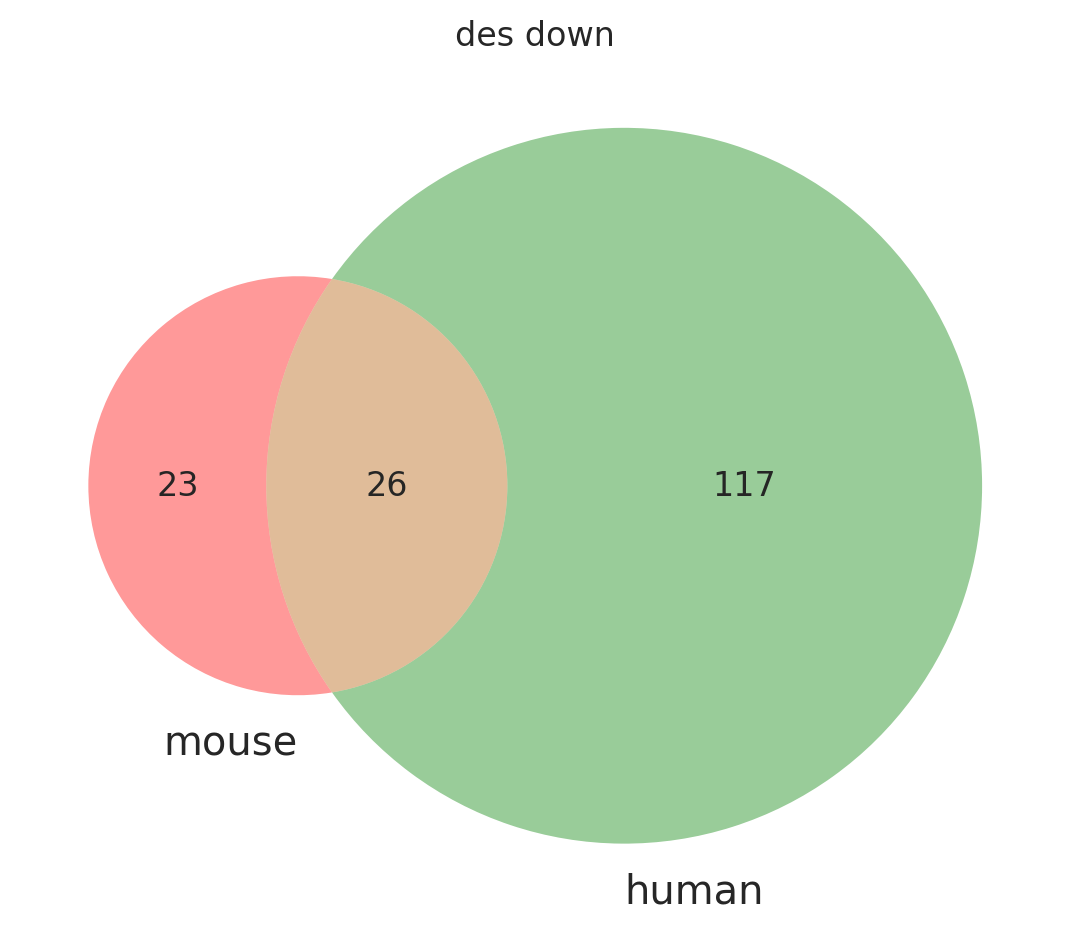

In [29]:
# create venn diagram
treatment = 'des'
direction = 'down'
gene_sets = [mouse_des_down_genes, human_des_down_genes]
matplotlib_venn.venn2(gene_sets,set_labels=['mouse','human'])
plt.title(treatment + ' ' + direction)

plt.savefig(treatment + '_' + direction + '_vennDiagram.pdf', bbox_inches='tight')

# create gene list
set_dict = {}
set_dict['mouse'] = sorted(gene_sets[0] - gene_sets[1])
set_dict['intersection'] = sorted(gene_sets[0].intersection(gene_sets[1]))
set_dict['human'] = sorted(gene_sets[1] - gene_sets[0])

# add blank spaces so all lists are the same length
max_length = 0 
for key in ['mouse', 'intersection', 'human']:
    if len(set_dict[key]) > max_length:
        max_length = len(set_dict[key])
for key in ['mouse', 'intersection', 'human']:
    current_genes = set_dict[key]
    while len(current_genes) < max_length:
        current_genes.append('')
    set_dict[key] = current_genes
current_frame = pd.DataFrame(set_dict, columns=['mouse', 'intersection', 'human'])

current_frame.to_csv(treatment + '_' + direction + '_geneList.tsv', sep='\t')

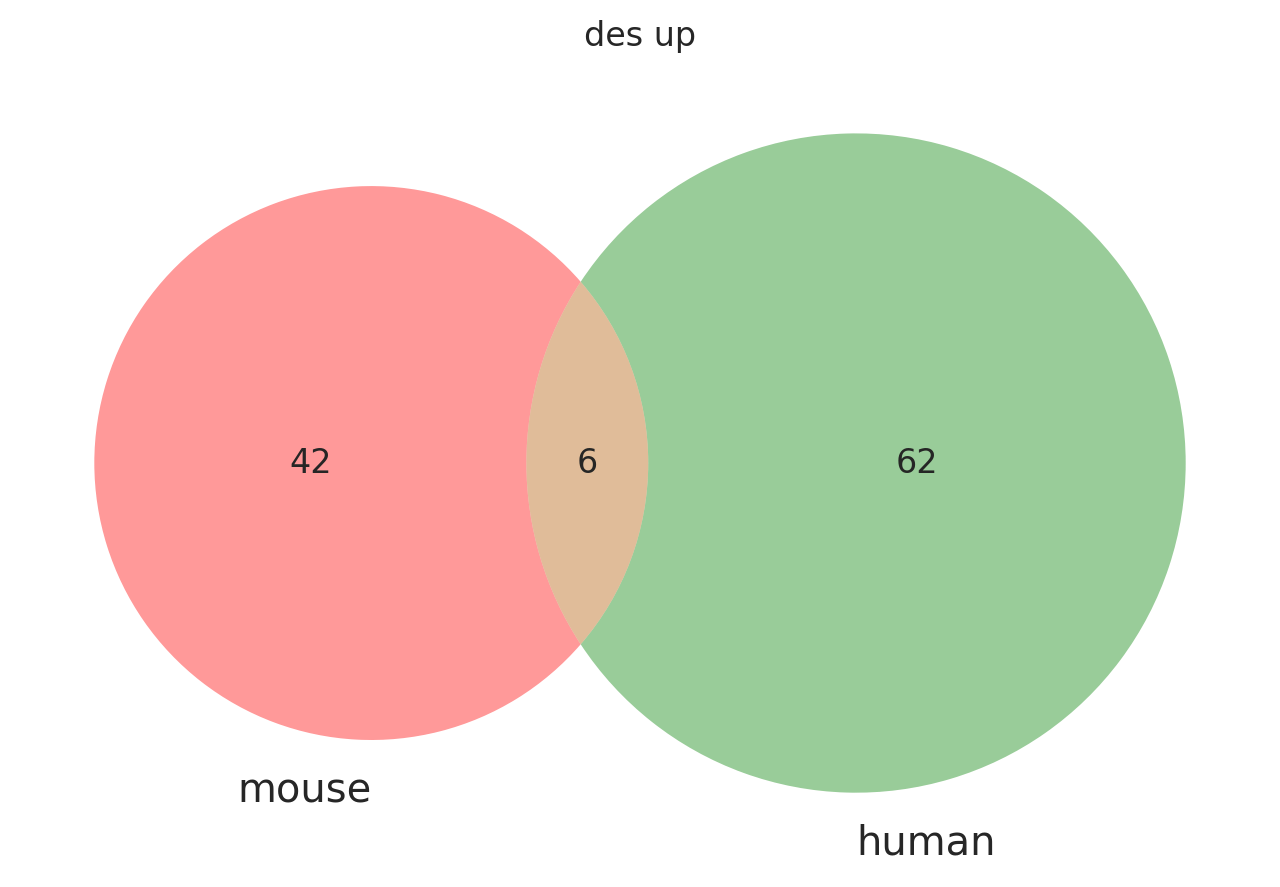

In [31]:
# create venn diagram
treatment = 'des'
direction = 'up'
gene_sets = [mouse_des_up_genes, human_des_up_genes]
matplotlib_venn.venn2(gene_sets,set_labels=['mouse','human'])
plt.title(treatment + ' ' + direction)

plt.savefig(treatment + '_' + direction + '_vennDiagram.pdf', bbox_inches='tight')

# create gene list
set_dict = {}
set_dict['mouse'] = sorted(gene_sets[0] - gene_sets[1])
set_dict['intersection'] = sorted(gene_sets[0].intersection(gene_sets[1]))
set_dict['human'] = sorted(gene_sets[1] - gene_sets[0])

# add blank spaces so all lists are the same length
max_length = 0 
for key in ['mouse', 'intersection', 'human']:
    if len(set_dict[key]) > max_length:
        max_length = len(set_dict[key])
for key in ['mouse', 'intersection', 'human']:
    current_genes = set_dict[key]
    while len(current_genes) < max_length:
        current_genes.append('')
    set_dict[key] = current_genes
current_frame = pd.DataFrame(set_dict, columns=['mouse', 'intersection', 'human'])

current_frame.to_csv(treatment + '_' + direction + '_geneList.tsv', sep='\t')

### DMHCA

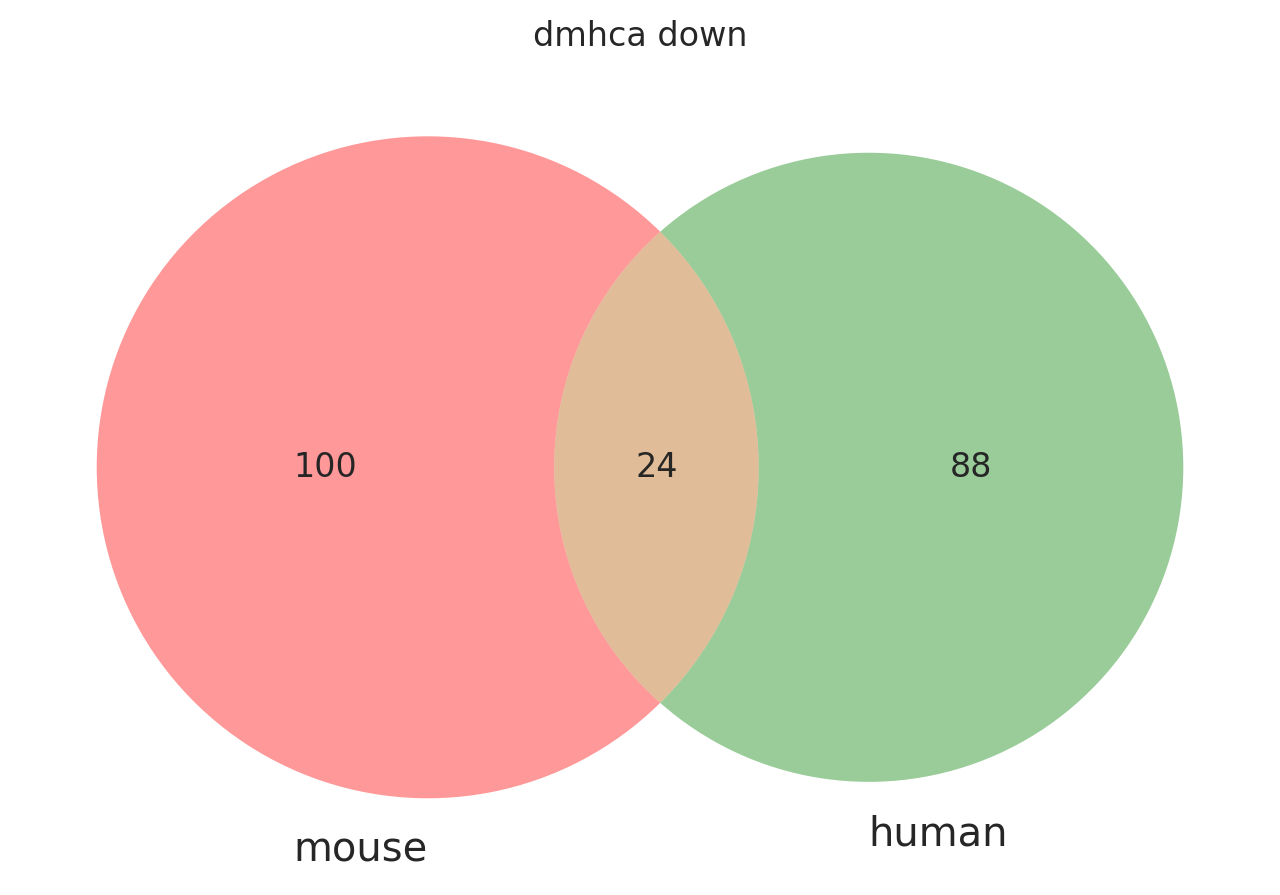

In [32]:
# create venn diagram
treatment = 'dmhca'
direction = 'down'
gene_sets = [mouse_dmhca_down_genes, human_dmhca_down_genes]
matplotlib_venn.venn2(gene_sets,set_labels=['mouse','human'])
plt.title(treatment + ' ' + direction)

plt.savefig(treatment + '_' + direction + '_vennDiagram.pdf', bbox_inches='tight')

# create gene list
set_dict = {}
set_dict['mouse'] = sorted(gene_sets[0] - gene_sets[1])
set_dict['intersection'] = sorted(gene_sets[0].intersection(gene_sets[1]))
set_dict['human'] = sorted(gene_sets[1] - gene_sets[0])

# add blank spaces so all lists are the same length
max_length = 0 
for key in ['mouse', 'intersection', 'human']:
    if len(set_dict[key]) > max_length:
        max_length = len(set_dict[key])
for key in ['mouse', 'intersection', 'human']:
    current_genes = set_dict[key]
    while len(current_genes) < max_length:
        current_genes.append('')
    set_dict[key] = current_genes
current_frame = pd.DataFrame(set_dict, columns=['mouse', 'intersection', 'human'])

current_frame.to_csv(treatment + '_' + direction + '_geneList.tsv', sep='\t')

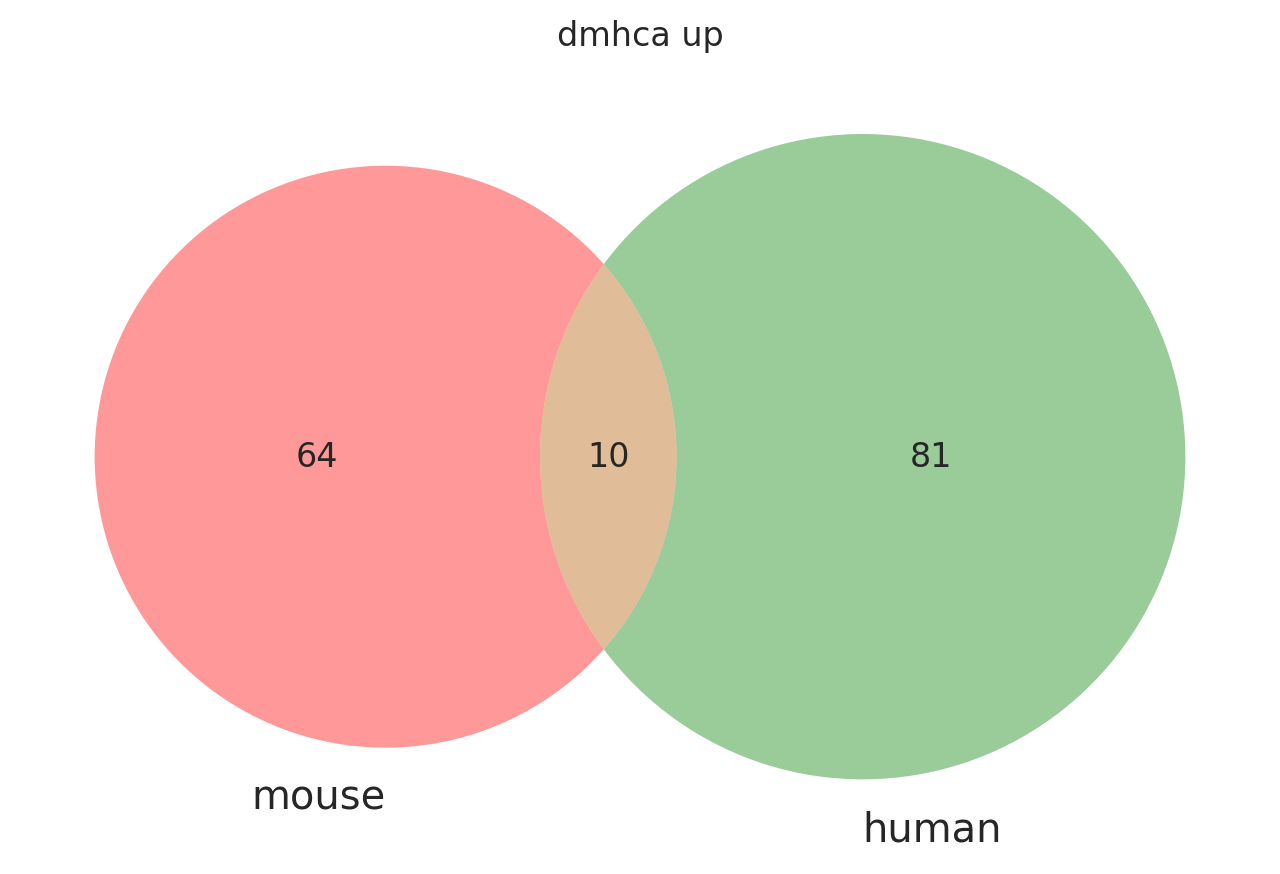

In [33]:
# create venn diagram
treatment = 'dmhca'
direction = 'up'
gene_sets = [mouse_dmhca_up_genes, human_dmhca_up_genes]
matplotlib_venn.venn2(gene_sets,set_labels=['mouse','human'])
plt.title(treatment + ' ' + direction)

plt.savefig(treatment + '_' + direction + '_vennDiagram.pdf', bbox_inches='tight')

# create gene list
set_dict = {}
set_dict['mouse'] = sorted(gene_sets[0] - gene_sets[1])
set_dict['intersection'] = sorted(gene_sets[0].intersection(gene_sets[1]))
set_dict['human'] = sorted(gene_sets[1] - gene_sets[0])

# add blank spaces so all lists are the same length
max_length = 0 
for key in ['mouse', 'intersection', 'human']:
    if len(set_dict[key]) > max_length:
        max_length = len(set_dict[key])
for key in ['mouse', 'intersection', 'human']:
    current_genes = set_dict[key]
    while len(current_genes) < max_length:
        current_genes.append('')
    set_dict[key] = current_genes
current_frame = pd.DataFrame(set_dict, columns=['mouse', 'intersection', 'human'])

current_frame.to_csv(treatment + '_' + direction + '_geneList.tsv', sep='\t')